# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo, Daniel Matlock

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [53]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
import pandas as pd
from seebuoy import NDBC

In [55]:
ndbc = NDBC()

In [56]:
df_avail = ndbc.available_data(station_id="44091")

In [57]:
df_data = ndbc.get_data("44065")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2024-02-19 00:00:00,NaN,6.0,8.0,NaN,NaN,NaN,NaN,1009.2,NaN,4.9,NaN,NaN,NaN,NaN
2024-02-19 00:10:00,NaN,7.0,9.0,1.3,NaN,4.7,171.0,NaN,NaN,4.9,NaN,NaN,NaN,NaN
2024-02-19 00:20:00,NaN,7.0,9.0,1.3,7.0,4.7,171.0,NaN,NaN,4.8,NaN,NaN,NaN,NaN
2024-02-19 00:30:00,NaN,8.0,10.0,NaN,NaN,NaN,NaN,1009.3,NaN,4.8,NaN,NaN,NaN,NaN
2024-02-19 00:40:00,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04 00:30:00,NaN,17.0,23.0,NaN,NaN,NaN,NaN,993.7,NaN,6.9,NaN,NaN,NaN,NaN
2024-04-04 00:40:00,NaN,17.0,23.0,NaN,NaN,NaN,NaN,993.8,NaN,6.9,NaN,NaN,NaN,NaN
2024-04-04 00:50:00,NaN,17.0,23.0,4.1,10.0,7.3,115.0,992.8,NaN,6.9,NaN,NaN,NaN,NaN


In [58]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [59]:
try:
    del df_data['pressure_tendency']
    del df_data['dewpoint']
    del df_data['air_temp']
except:
    pass

In [60]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
dominant_period,1232,3335,36.941529
pressure,207,3335,6.206897
wind_speed,87,3335,2.608696
wind_gust,87,3335,2.608696
water_temp,28,3335,0.839580
mean_wave_direction,16,3335,0.479760
wave_height,0,3335,0.000000
average_period,0,3335,0.000000


In [61]:
df_data

,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
date,,,,,,,,
2024-02-19 00:10:00,7.0,9.0,1.3,NaN,4.7,171.0,NaN,4.9
2024-02-19 00:20:00,7.0,9.0,1.3,7.0,4.7,171.0,NaN,4.8
2024-02-19 00:50:00,8.0,10.0,1.4,6.0,4.9,179.0,1009.6,4.8
2024-02-19 01:10:00,8.0,10.0,1.4,NaN,4.7,184.0,1009.8,4.9
2024-02-19 01:20:00,9.0,11.0,1.4,6.0,4.7,184.0,1009.7,4.9
...,...,...,...,...,...,...,...,...
2024-04-03 23:40:00,NaN,NaN,3.8,9.0,7.2,103.0,NaN,6.9
2024-04-04 00:10:00,17.0,20.0,4.5,NaN,7.5,112.0,994.3,6.9
2024-04-04 00:20:00,16.0,21.0,4.5,10.0,7.5,112.0,993.8,6.9


In [62]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

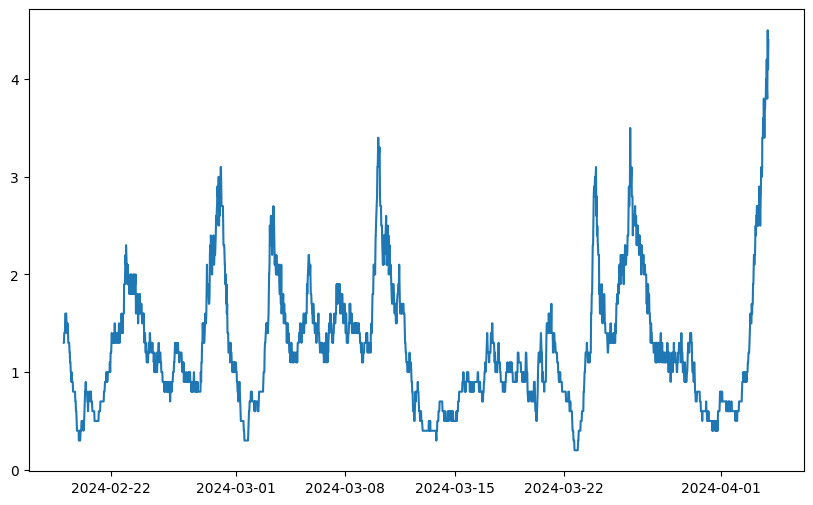

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

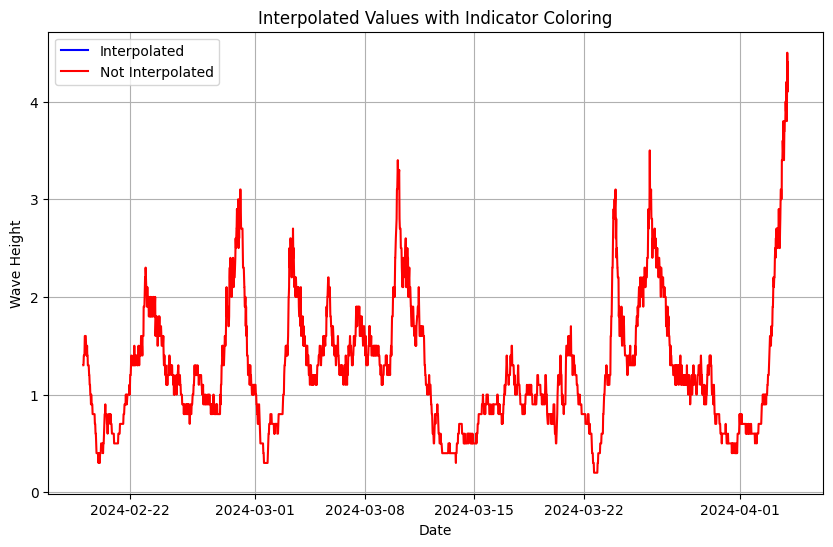

In [64]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [65]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

In [66]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})

# Initialize Prophet model
model = Prophet()
model.fit(modeling_df)

14:44:46 - cmdstanpy - INFO - Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-19 00:10:00,0.831141,0.280691,1.649324,0.831141,0.831141,0.149257,0.149257,0.149257,0.059671,0.059671,0.059671,0.089586,0.089586,0.089586,0.0,0.0,0.0,0.980398
1,2024-02-19 00:20:00,0.831716,0.276857,1.695172,0.831716,0.831716,0.146800,0.146800,0.146800,0.059320,0.059320,0.059320,0.087480,0.087480,0.087480,0.0,0.0,0.0,0.978516
2,2024-02-19 00:50:00,0.833440,0.316367,1.663298,0.833440,0.833440,0.137635,0.137635,0.137635,0.056535,0.056535,0.056535,0.081101,0.081101,0.081101,0.0,0.0,0.0,0.971076
3,2024-02-19 01:10:00,0.834590,0.315043,1.671227,0.834590,0.834590,0.130244,0.130244,0.130244,0.053444,0.053444,0.053444,0.076800,0.076800,0.076800,0.0,0.0,0.0,0.964834
4,2024-02-19 01:20:00,0.835165,0.245971,1.664101,0.835165,0.835165,0.126238,0.126238,0.126238,0.051601,0.051601,0.051601,0.074638,0.074638,0.074638,0.0,0.0,0.0,0.961403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,2024-04-20 01:20:00,0.953562,-0.865437,2.117348,-0.441800,2.151016,-0.265289,-0.265289,-0.265289,0.051601,0.051601,0.051601,-0.316889,-0.316889,-0.316889,0.0,0.0,0.0,0.688273
3351,2024-04-21 01:20:00,0.932773,-0.608632,2.611758,-0.582709,2.266865,0.168299,0.168299,0.168299,0.051601,0.051601,0.051601,0.116698,0.116698,0.116698,0.0,0.0,0.0,1.101072
3352,2024-04-22 01:20:00,0.911985,-0.834499,2.584569,-0.773270,2.353424,0.126238,0.126238,0.126238,0.051601,0.051601,0.051601,0.074638,0.074638,0.074638,0.0,0.0,0.0,1.038223
3353,2024-04-23 01:20:00,0.891196,-1.095206,2.639394,-0.933773,2.460778,-0.076583,-0.076583,-0.076583,0.051601,0.051601,0.051601,-0.128183,-0.128183,-0.128183,0.0,0.0,0.0,0.814614


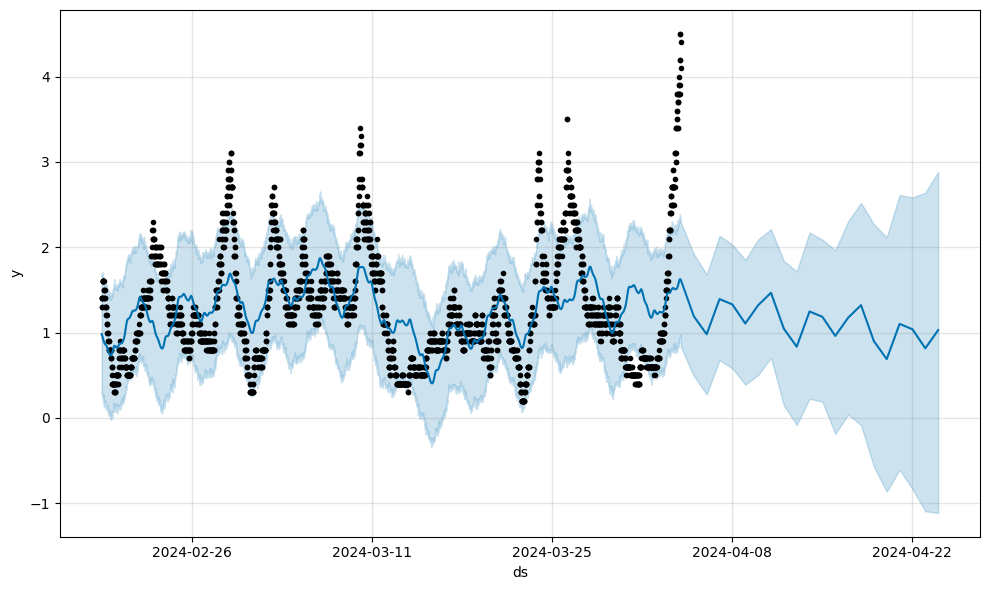

In [69]:
fig1 = model.plot(forecast)

In [70]:
today = pd.Timestamp.today()
future = forecast[forecast['ds'] >= today]

In [71]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3342,2024-04-12 01:20:00,1.119870,0.145287,1.839233,0.641673,1.513029,-0.074919,-0.074919,-0.074919,0.051601,0.051601,0.051601,-0.126520,-0.126520,-0.126520,0.0,0.0,0.0,1.044951
3343,2024-04-13 01:20:00,1.099082,-0.083934,1.717453,0.517636,1.589426,-0.265289,-0.265289,-0.265289,0.051601,0.051601,0.051601,-0.316889,-0.316889,-0.316889,0.0,0.0,0.0,0.833793
3344,2024-04-14 01:20:00,1.078293,0.224260,2.172374,0.413559,1.664611,0.168299,0.168299,0.168299,0.051601,0.051601,0.051601,0.116698,0.116698,0.116698,0.0,0.0,0.0,1.246592
3345,2024-04-15 01:20:00,1.057505,0.188307,2.088564,0.287363,1.734375,0.126238,0.126238,0.126238,0.051601,0.051601,0.051601,0.074638,0.074638,0.074638,0.0,0.0,0.0,1.183743
3346,2024-04-16 01:20:00,1.036716,-0.187963,1.965884,0.156475,1.789216,-0.076583,-0.076583,-0.076583,0.051601,0.051601,0.051601,-0.128183,-0.128183,-0.128183,0.0,0.0,0.0,0.960134
3347,2024-04-17 01:20:00,1.015928,0.038576,2.303280,0.028614,1.869161,0.158036,0.158036,0.158036,0.051601,0.051601,0.051601,0.106435,0.106435,0.106435,0.0,0.0,0.0,1.173964
3348,2024-04-18 01:20:00,0.995139,-0.085094,2.519058,-0.116018,1.976088,0.325423,0.325423,0.325423,0.051601,0.051601,0.051601,0.273822,0.273822,0.273822,0.0,0.0,0.0,1.320562
3349,2024-04-19 01:20:00,0.974350,-0.573100,2.268719,-0.268711,2.051880,-0.074919,-0.074919,-0.074919,0.051601,0.051601,0.051601,-0.126520,-0.126520,-0.126520,0.0,0.0,0.0,0.899431
3350,2024-04-20 01:20:00,0.953562,-0.865437,2.117348,-0.441800,2.151016,-0.265289,-0.265289,-0.265289,0.051601,0.051601,0.051601,-0.316889,-0.316889,-0.316889,0.0,0.0,0.0,0.688273
3351,2024-04-21 01:20:00,0.932773,-0.608632,2.611758,-0.582709,2.266865,0.168299,0.168299,0.168299,0.051601,0.051601,0.051601,0.116698,0.116698,0.116698,0.0,0.0,0.0,1.101072


In [96]:
from datetime import datetime
print("{:<30} {:<30} {:<10}".format("Date", "Wave Height Forecasted (m)", "yhat upper / yhat lower"))
print()
for index, row in future.iterrows():
     day = datetime.strptime(str(row['ds']), "%Y-%m-%d %H:%M:%S").strftime("%A %B %d")
     high_low = str(round(row['yhat_lower'],2))+" / "+ str(round(row['yhat_upper'],2))
     predicted = str(round(row['yhat'],2))
     print("{:<30} {:<30} {:<10}".format(day, predicted, high_low ))

Date                           Wave Height Forecasted (m)     yhat upper / yhat lower

Friday April 12                1.04                           0.15 / 1.84
Saturday April 13              0.83                           -0.08 / 1.72
Sunday April 14                1.25                           0.22 / 2.17
Monday April 15                1.18                           0.19 / 2.09
Tuesday April 16               0.96                           -0.19 / 1.97
Wednesday April 17             1.17                           0.04 / 2.3
Thursday April 18              1.32                           -0.09 / 2.52
Friday April 19                0.9                            -0.57 / 2.27
Saturday April 20              0.69                           -0.87 / 2.12
Sunday April 21                1.1                            -0.61 / 2.61
Monday April 22                1.04                           -0.83 / 2.58
Tuesday April 23               0.81                           -1.1 / 2.64
Wednesday April 24 